# Práctico 4 - Procesamiento Digital de Imágenes

In [566]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [567]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

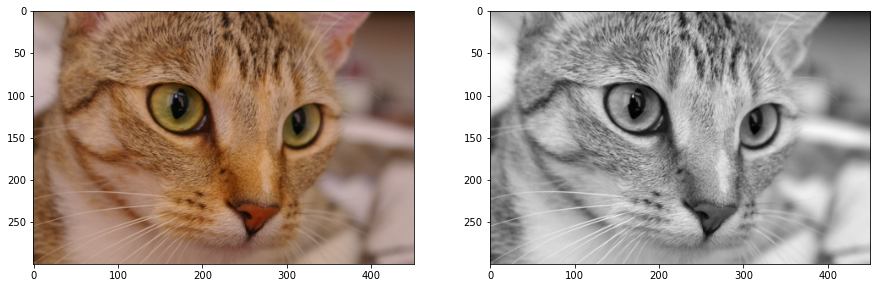

In [568]:
img_rgb = imageio.imread('imageio:chelsea.png')/255
img = rgb2yiq(img_rgb)[:,:,0]

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb)
axes[1].imshow(img, 'gray')

# 1. Transformada Discreta de Fourier 

1. Calcular y mostrar el espectro en módulo y fase de una imagen en escala de grises. Mostrar el módulo en escala logarítmica
2. Encuentre una transformada para la amplitud y una para la fase que permita guardar el espectro en imágenes de 8 bit perdiendo la menor cantidad de información posible
3. Implementar la transformada inversa que convierta el espectro guardado en imágenes de 8 bit en la imagen original 
4. Calcular el error medio cuadrático de ir y volver a la imagen de 8bit
5. Guardar tp4.png como tp4_amp.png y tp4_phase.png. Corregir la tp4_amp.png con MS Paint o similar. Leer el espectro modificado y reconstruir la imagen.

In [569]:
# fooplot
# np.fft.fft2 help

In [570]:
X = np.fft.fftshift(np.fft.fft2(img))

In [571]:
N, M = img.shape

In [572]:
Xm = np.abs(X)
Xp = np.angle(X)

In [573]:
#aplico el ln para poder visualizar
Xm = np.log(Xm + 10) / (N * M)
#Xm = Xm/Xm.max()

#guardar espectro y fase para luego editarlo en paint.
#cargo la imagen editada y:

#calculo la inversa de la función anterior, esta la uso para cuando cargue la foto del espectro editado.
Rm = np.exp(Xm*N * M) - 10

#luego debería antitransformar y encuentro la imagen corregida.

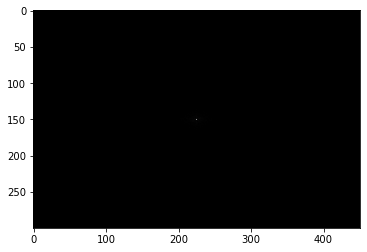

In [574]:
#plt.imshow(Xm, 'gray')
#plt.imshow(Xm, 'gray')

plt.imshow(Rm, 'gray')


In [575]:
#plt.imshow(Ym, 'gray')
import math

[[0.5254902  0.56470588 0.60392157 ... 0.74509804 0.77254902 0.8       ]
 [0.54509804 0.58431373 0.62352941 ... 0.76078431 0.78823529 0.81176471]
 [0.56470588 0.6        0.63529412 ... 0.77254902 0.8        0.82352941]
 ...
 [0.60784314 0.64705882 0.68235294 ... 0.79607843 0.80784314 0.82352941]
 [0.62745098 0.6627451  0.69803922 ... 0.80784314 0.81960784 0.83137255]
 [0.64313725 0.67843137 0.71372549 ... 0.81568627 0.82745098 0.83921569]]


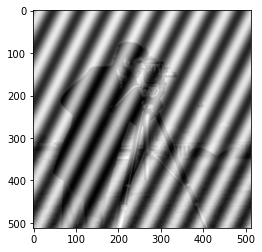

In [576]:
img2 = imageio.imread('tp4.png')/255
print(img2)
plt.imshow(img2 , 'gray')

In [577]:
J, K = img2.shape
Y = np.fft.fftshift(np.fft.fft2(img2)) #TDF de img2 * JK 

[[2.18410118e-06 1.11183787e-06 3.20210896e-06 ... 2.89630364e-06
  3.20210896e-06 1.11183787e-06]
 [2.01697629e-06 3.27638027e-06 3.94814942e-06 ... 3.20625965e-07
  1.20932322e-06 2.18993199e-06]
 [1.57715256e-06 1.97695919e-06 1.62023712e-06 ... 1.68305021e-06
  2.48923966e-06 1.31280215e-06]
 ...
 [2.41631668e-06 2.02095759e-06 5.16479700e-07 ... 2.23756385e-06
  1.24266994e-06 2.87685414e-06]
 [1.57715256e-06 1.31280215e-06 2.48923966e-06 ... 2.04144842e-06
  1.62023712e-06 1.97695919e-06]
 [2.01697629e-06 2.18993199e-06 1.20932322e-06 ... 2.32551084e-06
  3.94814942e-06 3.27638027e-06]]


(512, 512)

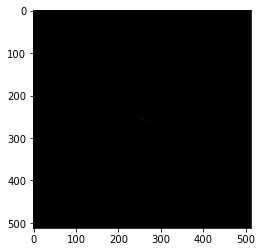

In [578]:
#espectro de la imagen
Ym = (np.abs(Y))*1/(J*K) # amplitud de la transformada discreta de fourier
#Yp = (np.angle(Y)+ math.pi)*(255/math.pi) #fase de la TDF
Yp = np.angle(Y)
plt.imshow(Ym, 'gray')

print(Ym)
np.shape(Ym)

In [579]:
#defino algunas variables

alfa = 100000
beta = 1

#aplico el ln para poder visualizar
Ym = np.log((alfa*Ym) + beta) #ln(amplitud de TDF +10)
#Ym = np.uint8(Ym)
Ym = Ym/Ym.max()

#inversa:
inversa = (np.exp(Ym - beta))/(alfa)

#guardar espectro y fase para luego editarlo en paint.
#cargo la imagen editada y:

#calculo la inversa de la función anterior, esta la uso para cuando cargue la foto del espectro editado.
#Ym = np.exp(Ym* J * K) - 10

#luego debería antitransformar y encuentro la imagen corregida.

[[0.01829513 0.00976367 0.02572672 ... 0.02355629 0.02572672 0.00976367]
 [0.01701602 0.02624627 0.0308176  ... 0.00292276 0.01057261 0.01833944]
 [0.01356283 0.0167071  0.01390684 ... 0.01440611 0.02058593 0.01142364]
 ...
 [0.0200436  0.0170467  0.00466378 ... 0.01870061 0.01084772 0.02341651]
 [0.01356283 0.01142364 0.02058593 ... 0.01720443 0.01390684 0.0167071 ]
 [0.01701602 0.01833944 0.01057261 ... 0.0193638  0.0308176  0.02624627]]


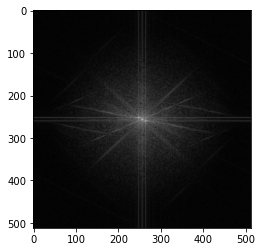

In [580]:
#grafico de el log(ampl(tdf)+10) la ampliud del espectro
plt.imshow(Ym, 'gray')
print(Ym)


[[3.74671788e-06 3.71488885e-06 3.77466566e-06 ... 3.76648189e-06
  3.77466566e-06 3.71488885e-06]
 [3.74192847e-06 3.77662729e-06 3.79393105e-06 ... 3.68956237e-06
  3.71789522e-06 3.74688390e-06]
 [3.72902916e-06 3.74077271e-06 3.73031223e-06 ... 3.73217510e-06
  3.75531069e-06 3.72106058e-06]
 ...
 [3.75327462e-06 3.74204326e-06 3.69599155e-06 ... 3.74823741e-06
  3.71891816e-06 3.76595546e-06]
 [3.72902916e-06 3.72106058e-06 3.75531069e-06 ... 3.74263355e-06
  3.73031223e-06 3.74077271e-06]
 [3.74192847e-06 3.74688390e-06 3.71789522e-06 ... 3.75072402e-06
  3.79393105e-06 3.77662729e-06]]


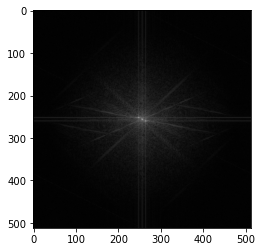

In [581]:
plt.imshow(abs(inversa/1000000000000), 'gray')
print(inversa)

In [582]:
#guardo esta amplitud

def imsave(fname,array):
    imageio.imsave(fname,(array*255).astype(np.uint8))

#imsave('tp4_amp.png', Ym)    

imageio.imsave('tp4_amp.png', np.uint8(Ym*255), 'png')

np.uint8(Ym*255)
# convert to colored strings  
#Ym = np.uint8(Ym)
#imageio.imsave('tp4_amp.png',Ym*255, 'png')
#imageio.imsave('tp4_amp1.png', Ymm , 'png')

array([[4, 2, 6, ..., 6, 6, 2],
       [4, 6, 7, ..., 0, 2, 4],
       [3, 4, 3, ..., 3, 5, 2],
       ...,
       [5, 4, 1, ..., 4, 2, 5],
       [3, 2, 5, ..., 4, 3, 4],
       [4, 4, 2, ..., 4, 7, 6]], dtype=uint8)

In [583]:
#em este punto edito con paint la Amplitud del del espectro, pintanto los puntos blancos

[[0.10588235 0.10196078 0.10980392 ... 0.10980392 0.10980392 0.10196078]
 [0.10588235 0.10980392 0.10980392 ... 0.10196078 0.10196078 0.10588235]
 [0.10588235 0.10588235 0.10588235 ... 0.10588235 0.10588235 0.10196078]
 ...
 [0.10588235 0.10588235 0.10196078 ... 0.10588235 0.10196078 0.10980392]
 [0.10588235 0.10196078 0.10588235 ... 0.10588235 0.10588235 0.10588235]
 [0.10588235 0.10588235 0.10196078 ... 0.10588235 0.10980392 0.10980392]]


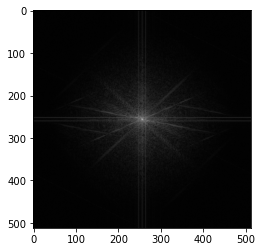

In [584]:
#cargo la amplitud del espectro editado
#img2 = imageio.imread('tp4.png')/255
A = imageio.imread('tp4_amp1.png')/255

A = A[:,:,0]
plt.imshow(A, 'gray')
print(A)


[4.08968294e-06 4.08968294e-06 4.08968294e-06 4.08968294e-06
 4.10575240e-06 4.07367637e-06 4.07367637e-06 4.08968294e-06
 4.05773245e-06 4.08968294e-06 4.07367637e-06 4.08968294e-06
 4.07367637e-06 4.10575240e-06 4.10575240e-06 4.08968294e-06
 4.08968294e-06 4.10575240e-06 4.10575240e-06 4.08968294e-06
 4.10575240e-06 4.08968294e-06 4.07367637e-06 4.07367637e-06
 4.08968294e-06 4.07367637e-06 4.10575240e-06 4.08968294e-06
 4.07367637e-06 4.08968294e-06 4.10575240e-06 4.10575240e-06
 4.10575240e-06 4.07367637e-06 4.08968294e-06 4.08968294e-06
 4.07367637e-06 4.07367637e-06 4.07367637e-06 4.08968294e-06
 4.08968294e-06 4.07367637e-06 4.08968294e-06 4.08968294e-06
 4.08968294e-06 4.10575240e-06 4.10575240e-06 4.07367637e-06
 4.08968294e-06 4.07367637e-06 4.08968294e-06 4.07367637e-06
 4.08968294e-06 4.08968294e-06 4.07367637e-06 4.08968294e-06
 4.08968294e-06 4.10575240e-06 4.10575240e-06 4.07367637e-06
 4.07367637e-06 4.08968294e-06 4.10575240e-06 4.07367637e-06
 4.08968294e-06 4.089682

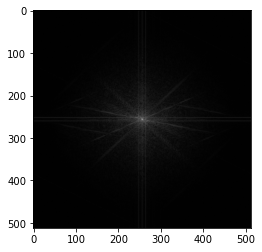

In [585]:
#aplico la funcion inversa:
#será la nueva amplitud del nuevo espectro
#amp = (np.exp(A*Ym.max()- beta))/(alfa)
Rm = (np.exp(A*Ym.max() - beta))/(alfa)
plt.imshow(Rm[:,:], 'gray')
#La nueva amplitud es
print(Rm[:,0])
#dimensiones de la nueva amplitud
print(np.shape(Rm))
#plt.imshow(abs(amp), 'gray')
#antitransformo
import cmath

j = cmath.sqrt(-1)
#nuevo expectro expresado como tdf = A * exp(j*tita)
#var = J * K * abs(amp) * (np.exp(j * Yp))
var =  abs(Rm) * (np.exp(j * Yp))
#primero pongo el punto blanco en la esquina izquierda
#luego antitransformo y aplico valor absoluto
antiT = J*K*abs(np.fft.ifft2(np.fft.ifftshift(var)))

print('La antitransformada es:')
print(antiT)


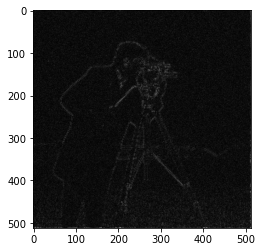

In [565]:
plt.imshow(antiT, 'gray')

In [542]:
rmse(A,img2)

0.5592464670158195